# Percentile Method

## How percentile works?
This technique works by setting a particular threshold value, which is decided based on our problem statement.
While we remove the outliers using capping (replacing values with different values), then that particular method is known as Winsorization.
Here, we always maintain symmetry on both sides, meaning if we remove 1% from the right, the left will also drop by 1%.

Let's understand this practically.

Importing libraries and dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import files
uploaded = files.upload()

Saving bhp.csv to bhp (1).csv


In [28]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [29]:
df.shape

(13200, 7)

In [30]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


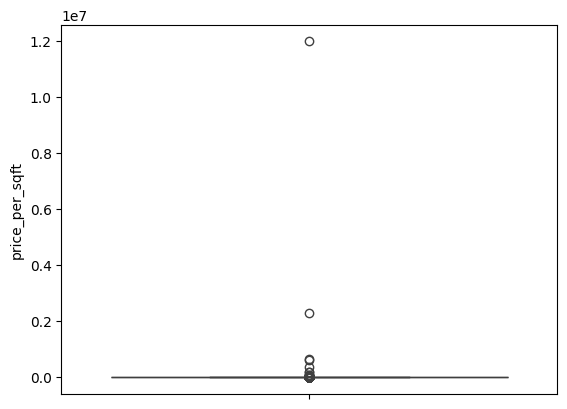

In [31]:
sns.boxplot(data=df.price_per_sqft)
plt.show()

In [32]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001,0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [33]:
df[(df.price_per_sqft < min_threshold) | (df.price_per_sqft > max_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


### These all are the outliers for this dataset.


### Removing the outliers from the dataset

In [34]:
df1 = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df1.shape

(13172, 7)

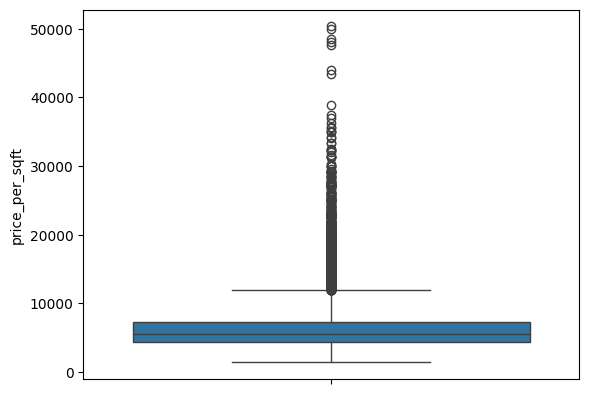

In [35]:
sns.boxplot(data=df1.price_per_sqft)
plt.show()

# **Now one can notice the extreme outliers are removed from the dataset.**

#Z Score

## What is Z Score?
Z score is an important concept in statistics. Z score is also called **standard score**. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

# Z score = (x -mean) / std. deviation
If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.


Let's understand this practically.


In [36]:
mini_threshold,maxi_threshold = df.price_per_sqft.quantile([0.01,0.99])
mini_threshold,maxi_threshold

(2549.0, 23674.45000000001)

In [37]:
df1 = df[(df.price_per_sqft > mini_threshold) & (df.price_per_sqft < maxi_threshold)]

In [38]:
df1.shape

(12932, 7)

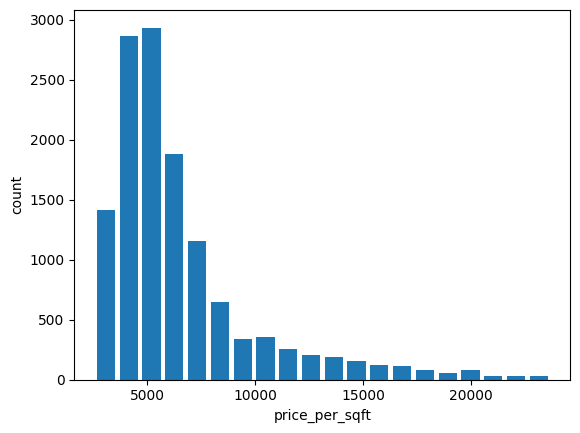

In [39]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

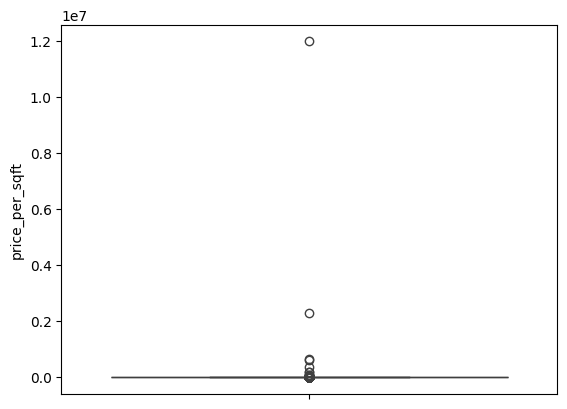

In [40]:
sns.boxplot(data=df.price_per_sqft)
plt.show()

In [41]:
mean=df1.price_per_sqft.mean()
mean

6497.641277451284

In [42]:
std=df1.price_per_sqft.std()
std

3501.731556569727

# Adding new column 'zscore' to the dataset which will have zscore for each data row

In [43]:
df1['zscore']=(df1.price_per_sqft - mean)/std
df1.head()

<ipython-input-43-818093c1b2d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore']=(df1.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.799216
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.537632
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.626159
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.072148
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.641866


In [44]:
df1[(df1.zscore > 3) | (df1.zscore < -3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.0,4,18181,3.336452
69,other,3 Bedroom,500.00,3.0,100.0,3,20000,3.855909
87,Rajaji Nagar,6 Bedroom,710.00,6.0,160.0,6,22535,4.579837
131,other,4 Bedroom,1200.00,4.0,210.0,4,17500,3.141977
147,other,6 Bedroom,1034.00,5.0,185.0,6,17891,3.253636
...,...,...,...,...,...,...,...,...
12874,Judicial Layout,5 BHK,1100.00,4.0,199.0,5,18090,3.310465
12917,2nd Stage Nagarbhavi,5 Bedroom,1200.00,4.0,240.0,5,20000,3.855909
12967,other,5 BHK,5665.84,7.0,988.0,5,17437,3.123986
12985,other,4 BHK,2920.00,4.0,536.0,4,18356,3.386427


These are the outliers for this dataset

For removing the outliers:

In [45]:
df2 = df1[(df1.zscore < 3) & (df1.zscore > -3)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.799216
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.537632
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.626159
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.072148
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.641866


In [46]:
df2.shape

(12612, 8)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

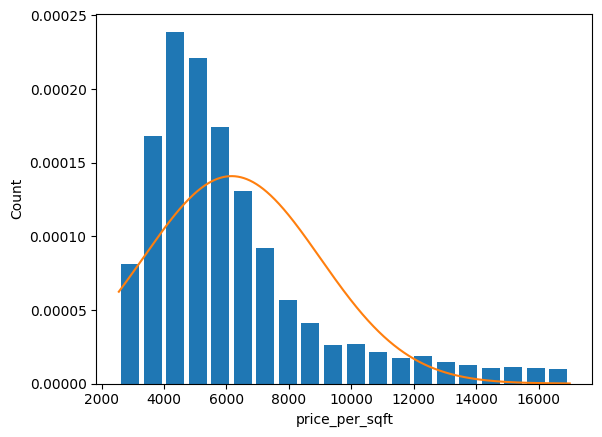

In [48]:
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))